In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df=pd.read_csv("Titanic.csv")

In [228]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [230]:
for i in df.columns:
    print(i,':',df[i].isnull().values.sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


In [231]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [232]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [233]:
df=df.drop(['Cabin'],axis=1)

In [234]:
df.isna().values.sum()

0

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [236]:
from sklearn.preprocessing import OneHotEncoder,label_binarize

In [237]:
encoder=OneHotEncoder()
encoder_df=pd.DataFrame(encoder.fit_transform(df[['Embarked']]).toarray(),columns=df['Embarked'].unique())
encoder_df_gender=pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray(),columns=df['Sex'].unique())

df=df.join(encoder_df)


In [238]:
df=df.join(encoder_df_gender)

In [239]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,S,C,Q,male,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0,0.0,1.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0.0,0.0,1.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0.0,0.0,1.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1.0,0.0,0.0,0.0,1.0


In [240]:
df.drop(['Embarked'],axis=1,inplace=True)

In [241]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,S,C,Q,male,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,1.0


In [242]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [243]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q,male,female
0,0,3,male,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [244]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,S,C,Q,male,female
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.352413,0.647587
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
df['S'].sum(),df['C'].sum(),df['Q'].sum()

(168.0, 77.0, 646.0)

In [246]:
df['male'].sum(), df['female'].sum()

(314.0, 577.0)

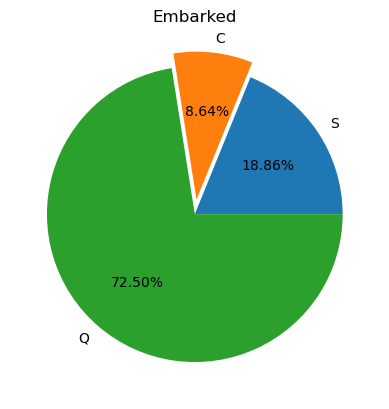

In [247]:
explode=[0,0.1,0]
data= np.array([df['S'].sum(),df['C'].sum(),df['Q'].sum()])
keys=['S','C','Q']
plt.title('Embarked')
plt.pie(data,labels=keys,explode=explode,autopct='%.2f%%')
plt.show()

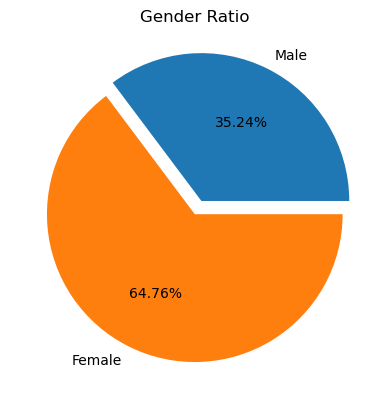

In [248]:

data= np.array([df['male'].sum(), df['female'].sum()])
keys=['Male','Female']
plt.title('Gender Ratio')
plt.pie(data,labels=keys,explode=[0.1,0],autopct='%.2f%%')
plt.show()

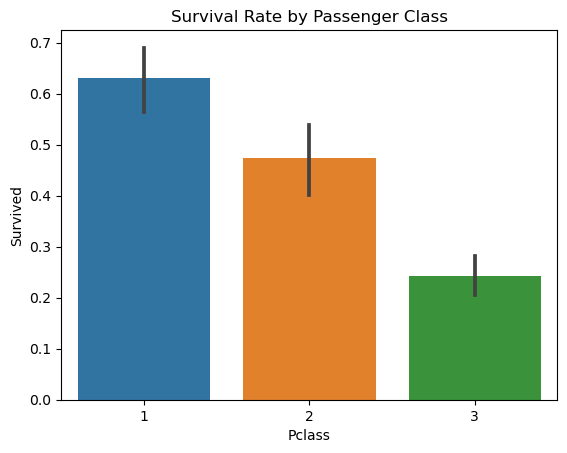

In [249]:
plt.title('Survival Rate by Passenger Class')
sns.barplot(data=df,x='Pclass',y='Survived')
plt.show()

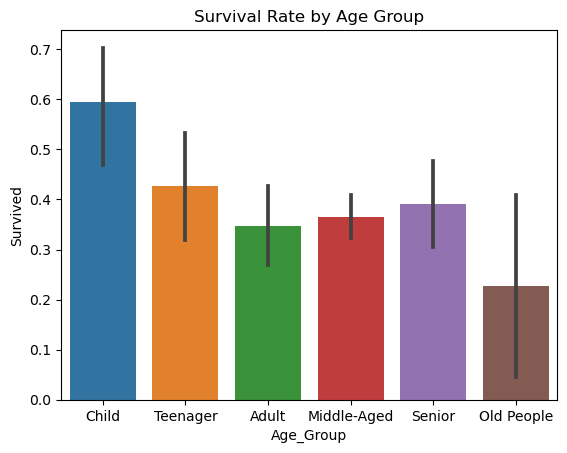

In [250]:
plt.title('Survival Rate by Age Group')
bins=[0,10,18,24,40,60,80]
keys=['Child','Teenager','Adult','Middle-Aged','Senior','Old People']
df['Age_Group']=pd.cut(df['Age'],bins=bins,labels=keys)
sns.barplot(data=df,x='Age_Group',y='Survived')
plt.show()

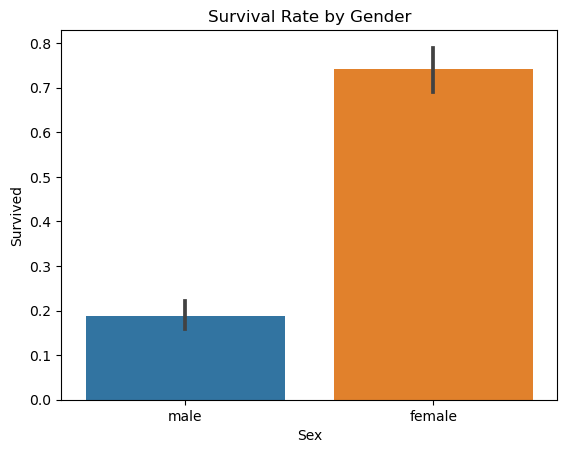

In [264]:
plt.title('Survival Rate by Gender')
sns.barplot(data=df,x='Sex',y='Survived')
plt.show()

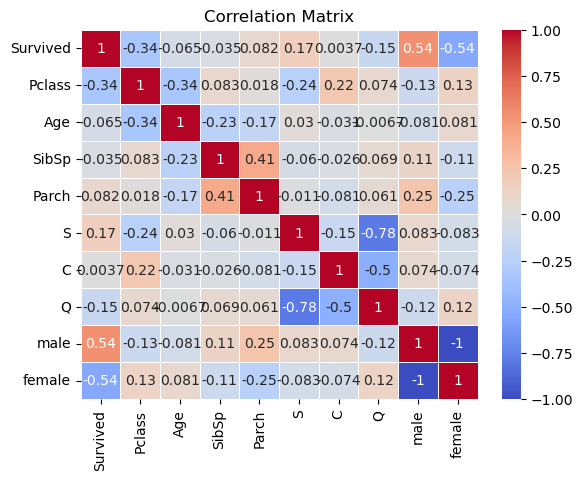

In [255]:
corr_matrix=df[['Survived','Pclass','Age','SibSp','Parch','S','C','Q','male','female']].corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

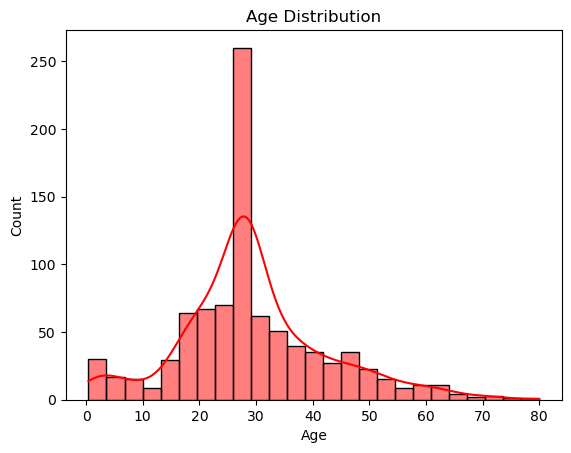

In [252]:
sns.histplot(df['Age'], kde=True, color='red', bins=25)
plt.title('Age Distribution')
plt.show()

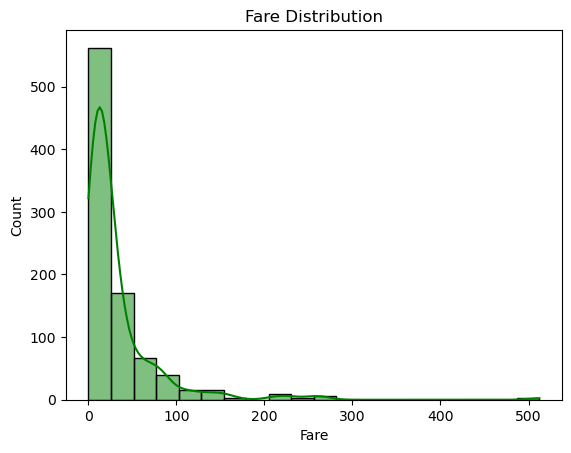

In [260]:
plt.title('Fare Distribution')
ax=sns.histplot(df['Fare'],bins=20,kde=True,color='Green')

plt.show()